In [ ]:
# Setting up the Colab page to use neqsim
%%capture
!pip install neqsim
from neqsim.process import openprocess
import urllib
import time
# Importing the TEG process from file
!wget https://github.com/equinor/neqsimprocess/blob/master/lib/offshorePro.neqsim

In [ ]:
# importing the process from the stored file
# See: https://github.com/equinor/neqsimprocess/blob/master/src/neqsimprocess/oilgasprocess/sepproces.java
# See Figure 1 for process flow diagram
GasOilProcess = openprocess('offshorePro.neqsim')

## figure oil process
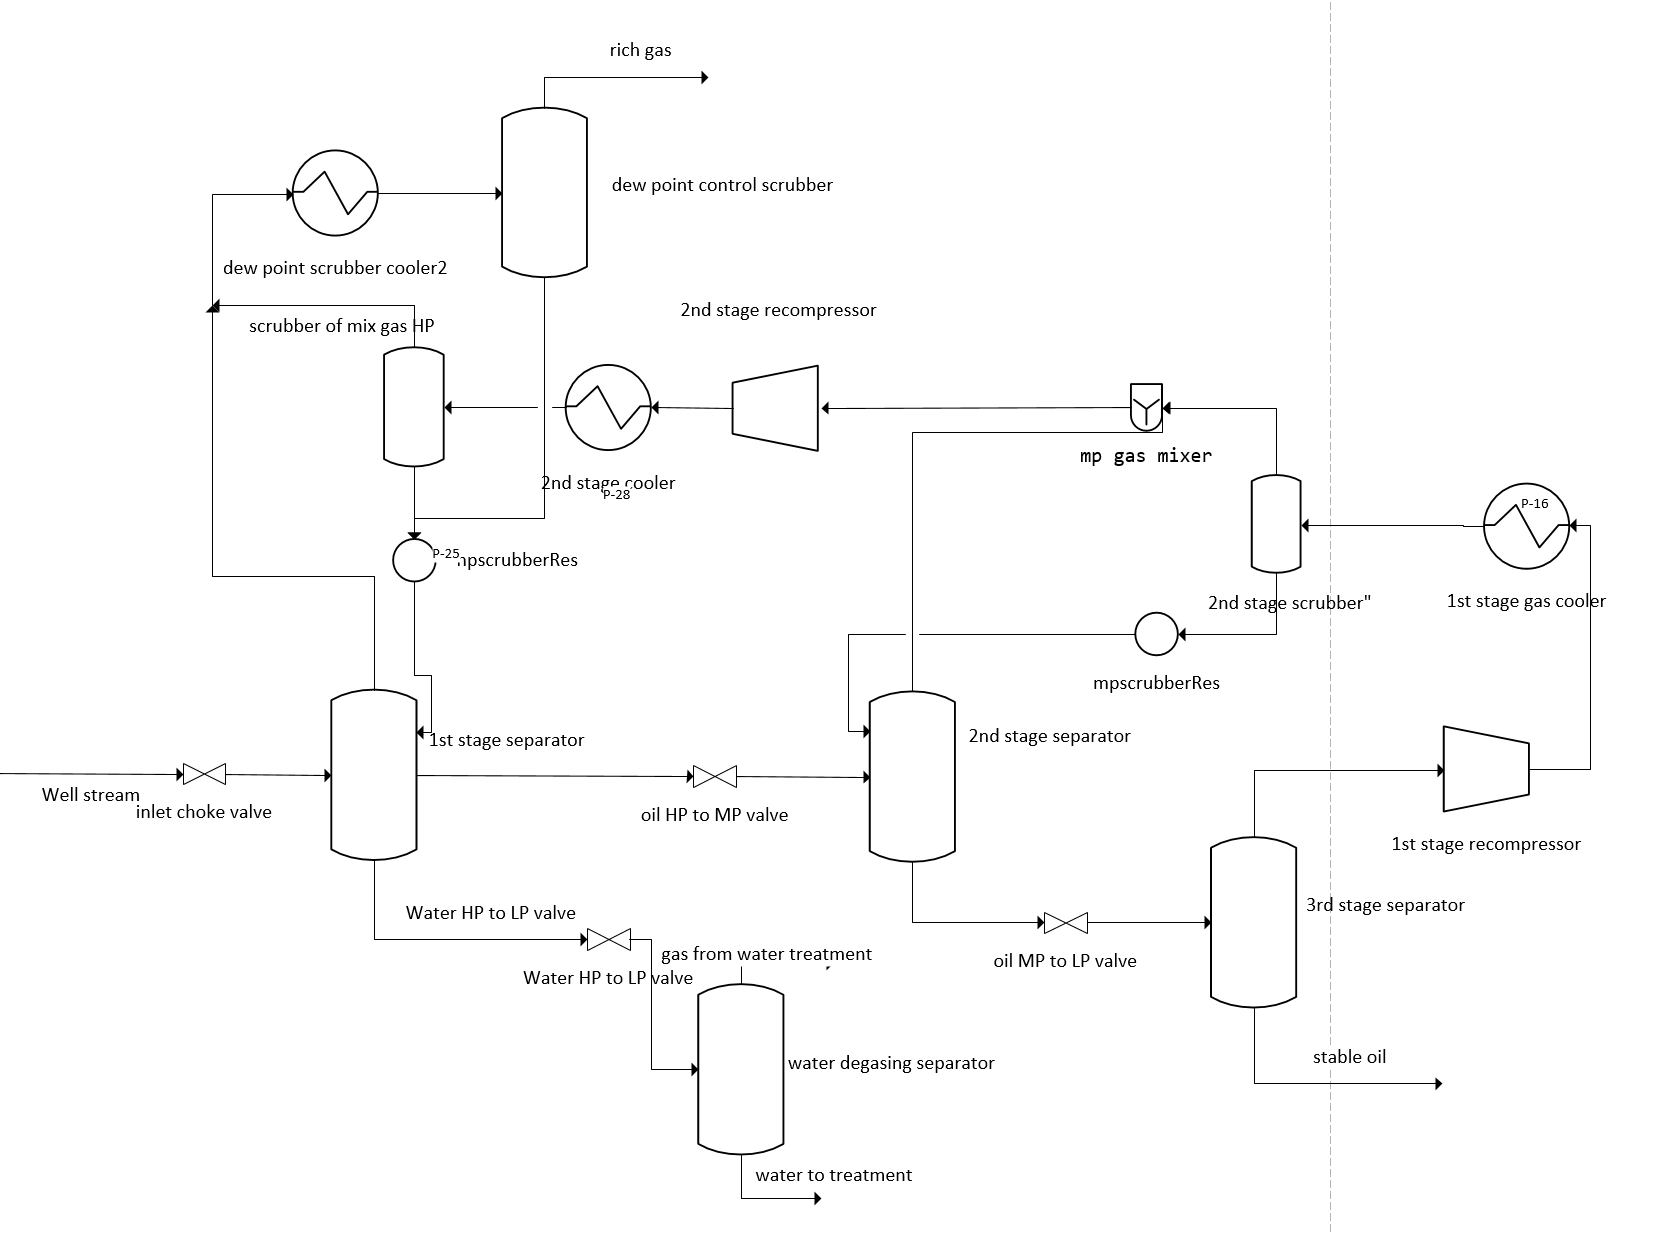.....

In [ ]:
from neqsim.process import openprocess
import time
import pandas as pd
from neqsim.thermo import createfluid,fluid_df,TPflash

# Create alternativ well stream
#wellStreamComposition = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "water"], 
#        'MolarComposition[-]':  [0.53, 3.3, 72.98, 7.68, 4.1, 0.7, 1.42, 0.54, 0.67, 0.85, 1.33, 1.33, 0.78, 0.61, 0.42, 0.33, 0.42, 0.24, 0.3, 0.17, 0.21, 0.15, 0.15, 0.8, 10.0], 
#        'MolarMass[kg/mol]': [None,None, None,None,None,None,None,None,None,None,0.0913, 0.1041, 0.1188, 0.136, 0.150, 0.164, 0.179, 0.188, 0.204, 0.216, 0.236, 0.253, 0.27, 0.391, None],
#        'RelativeDensity[-]': [None,None, None,None,None,None,None,None,None,None, 0.746, 0.768, 0.79, 0.787, 0.793, 0.804, 0.817, 0.83, 0.835, 0.843, 0.837, 0.84, 0.85, 0.877, None]
#  } 
#
#wellStreamCompositiondf = pd.DataFrame(wellStreamComposition) 
#wellStream = fluid_df(wellStreamCompositiondf)
#GasOilProcess.getUnit("well stream").setThermoSystem(wellStream)


GasOilProcess.getUnit("well stream").setFlowRate(12.23, 'MSm3/day')
GasOilProcess.getUnit("well stream").setPressure(120.0, "bara")
GasOilProcess.getUnit("well stream").setTemperature(65.0, "C")
GasOilProcess.getUnit("inlet choke valve").setOutletPressure(52.21)
GasOilProcess.getUnit("1st stage separator").setEntrainment(0.1, "", "oil", "aqueous")
GasOilProcess.getUnit("oil HP to MP valve").setOutletPressure(15.0)
GasOilProcess.getUnit("oil cooler/heater to 2nd stage").setOutTemperature(313.15)
GasOilProcess.getUnit("oil MP to LP valve").setOutletPressure(1.8)
GasOilProcess.getUnit("Water HP to LP valve").setOutletPressure(1.01325)
GasOilProcess.getUnit("dew point scrubber cooler2").setOutTemperature(303.15)
GasOilProcess.getUnit("1st stage recompressor").setIsentropicEfficiency(0.75)
GasOilProcess.getUnit("2nd stage recompressor").setIsentropicEfficiency(0.75)

#Run the process calculations
tic = time.perf_counter()
GasOilProcess.run()
toc = time.perf_counter()
print(f"Simulation run in {toc - tic:0.4f} seconds")



#Read results
GasLiqidRatio = GasOilProcess.getUnit("rich gas").getFluid().getFlowRate("Sm3/hr")/GasOilProcess.getUnit("stable oil").getFluid().getFlowRate("m3/hr")
compressorPower1 = GasOilProcess.getUnit("1st stage recompressor").getPower()/1.0e3
compressorPower2 = GasOilProcess.getUnit("2nd stage recompressor").getPower()/1.0e3

wellStreamFLowMSm3day = GasOilProcess.getUnit("well stream").getFluid().getFlowRate("MSm3/day")
richGasFLowMSm3day = GasOilProcess.getUnit("rich gas").getFluid().getFlowRate("MSm3/day")
gasInletSepFlowMSm3day = GasOilProcess.getUnit("1st stage separator").getGasOutStream().getFluid().getFlowRate("MSm3/day")
stableOilFLowm3hr = GasOilProcess.getUnit("stable oil").getFluid().getFlowRate("m3/hr")
waterToTreatmentRatem3hr = GasOilProcess.getUnit("water to treatment").getFluid().getFlowRate("m3/hr")
resycleFLowDewPointScrubber = GasOilProcess.getUnit("dew point control scrubber").getLiquidOutStream().getFluid().getFlowRate("kg/hr")
#GasOilProcess.getUnit("well stream").getFluid().display()
#GasOilProcess.getUnit("rich gas").getFluid().display()
#GasOilProcess.getUnit("water to treatment").getFluid().display()
#GasOilProcess.getUnit("stable oil").getFluid().display()
#GasOilProcess.getUnit("1st stage separator").getThermoSystem().display()
#GasOilProcess.getUnit("dew point control scrubber").getLiquidOutStream().getFluid().display()

#GasOilProcess.getUnit("rich gas").phaseEnvelope();
#GasOilProcess.getUnit("stable oil").phaseEnvelope();

AttributeError: ignored